# Predicting Heart Disease using Machine Learning

This notebook looks into various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether a person has heart disease or not based on their attributes

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement
> Given the clinical parameters of a patient, can we predict whether the person will have heart disease or not?

## 2. Data
The original data came from cleveland database from UCI Machine Learning repository.
There is also a verison of it available on kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

>  If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
Features are different parts of the data. During this step, we'll want to start finding out what we can understand about the data.

One of the most common ways to do this, is to create a data dictionary.

Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

**Create Data Dictionary**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)



## Preparing the tools

We're going to use pandas, NumPy and matplotlib for data analysis and manipulation

In [1]:
# Importing all the tools we need
#These tools are added in the beginning based on the expectations of what will be needed.
#As the requirements increased more tools were imported over here

# Regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Since we want our plots to appear inside the notebook
%matplotlib inline 

# Models from sklearn (sci-kit learn)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data


In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows, columns)

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration (EDA)

The goal is here is to find more about the data and become a subject matter expert on the data we are working with

1. what questions are we trying to solve?
2. what kind of data are we having and how do we treat different types of data?
3. what's missing from the data and how do we deal with it?
4. where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Let's find out how many of each class value are there
# 165 indicates the no. of positive heart disease cases
# 138 indicates the no. of negative heart disease cases
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

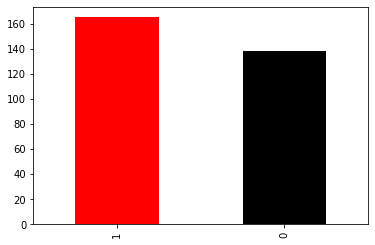

In [6]:
df["target"].value_counts().plot(kind="bar", color=["Red","black"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Statistical representation of our dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to the sex



In [10]:
# 1 = Male, 0 = Female
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex tab
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


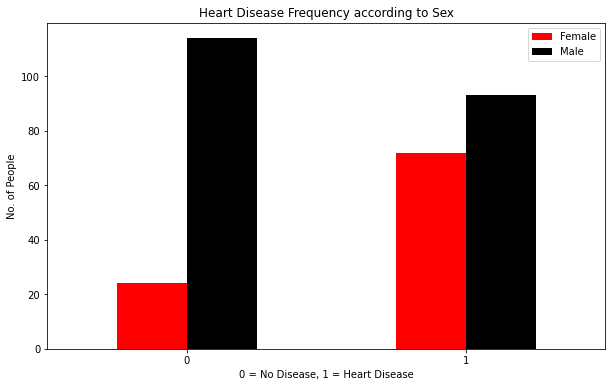

In [12]:
# Creating a plot of Crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["Red", "black"]);

plt.title("Heart Disease Frequency according to Sex")
plt.xlabel("0 = No Disease, 1 = Heart Disease")
plt.ylabel("No. of People")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs Cholestrol for Heart Disease

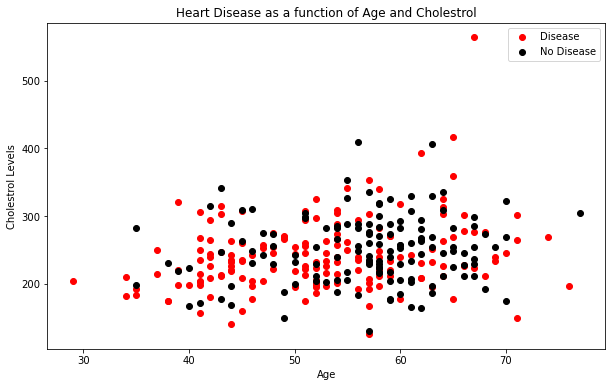

In [13]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive Examples
plt.scatter(df.age[df.target==1],
               df.chol[df.target==1],
               color="Red");

# Scatter with Negative Examples
plt.scatter(df.age[df.target==0],
                df.chol[df.target==0],
                color="Black");

# Adding some helpful info
plt.title("Heart Disease as a function of Age and Cholestrol")
plt.xlabel("Age")
plt.ylabel("Cholestrol Levels")
plt.legend(["Disease", "No Disease"]);

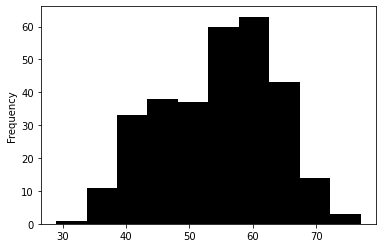

In [14]:
# Check the distribution of the age column with a Histogram
df.age.plot.hist(color="Black");

### Heart Disease as a fuction on Chest Pain Type

* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
    
**Note: This comparison raises doubts as *cp_type_1 & cp_type_2* which as the data dictionary suggests is a non heart related chest pain type, but somehow the comparison is showing more heart diseases in *cp_type_1 & cp_type_2*. At this point, it is best to have a discussion with the data acquirerer or an expert in heart disease to understand why such phenomenon is obtained.**

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


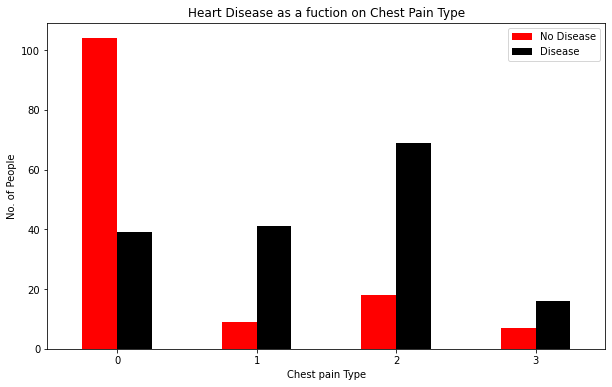

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["Red","black"])

plt.title("Heart Disease as a fuction on Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("No. of People")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

In [17]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


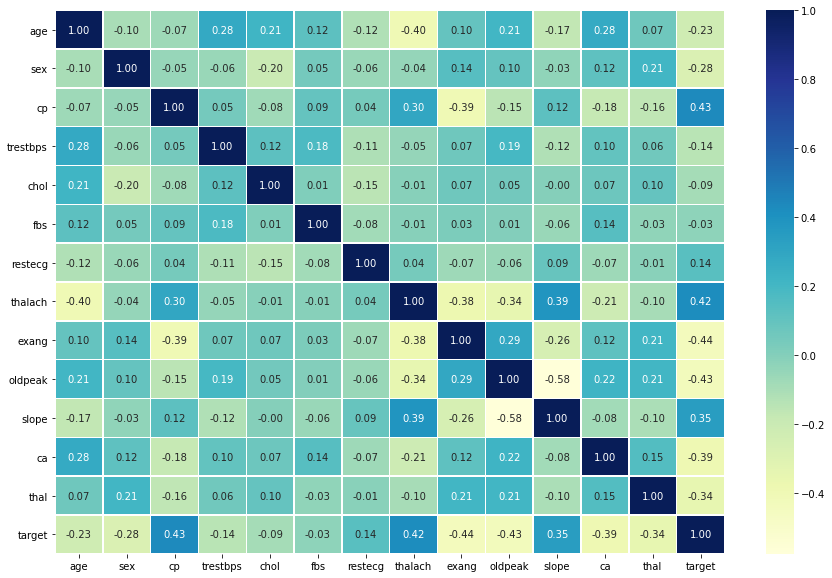

In [18]:
# let's make our correlation matrix a bit more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                            annot = True,
                            linewidths=0.5,
                            fmt = ".2f",
                            cmap = "YlGnBu");

## 5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Split data in X and y
X = df.drop("target", axis=1)
y = df["target"]

In [21]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# Split data into train and test sets

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [24]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [25]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

Now we've got our data split into training and test sets. Its time build a machine learning model.

We'll use the training set to train the model (i.e. find the patters)

we'll test it by using the test set (i.e use the patters)

We're going to try 3 different Machine Learning models:
    1. Logistic Regression
    2. K-Nearest Neighbors Classifier
    3. Random Forest Classifier
    
Narrowing down to these 3 alogrithms was down by following the sci-kit learn "Choosing the right machine learning model" diagram.

In [26]:
# put the models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
                 "KNN" : KNeighborsClassifier(),
                 "Random Forest" : RandomForestClassifier()}

# create a function fit and score the model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates a given machine learning model
    models : dictionary of the different machine learning models
    X_train : Training set (no labels)
    y_train : training labels
    X_test : Testing set (no labels)
    y_test : Testing Labels
    """
    #set a random seed
    np.random.seed(42)
    #create a scoring dictionary
    models_scores = {}
    #Loop through the models dictionary
    for name, model in models.items():
        #Fitting the model to training sets
        model.fit(X_train, y_train)
        #Evaluate the model and appending it to the scoring dictionary
        models_scores[name] = model.score(X_test, y_test)
    return models_scores

In [27]:
models_scores = fit_and_score(models = models,
                                                X_train = X_train,
                                                X_test = X_test,
                                                y_train = y_train,
                                                y_test = y_test)

models_scores

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

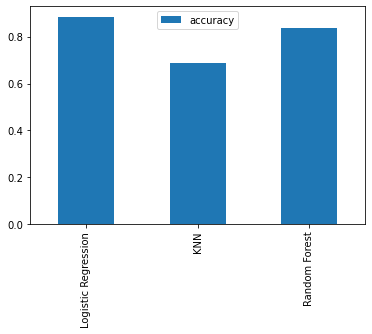

In [28]:
model_compare = pd.DataFrame(models_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model and we know that model's first prediction aren't always what we should base our next steps off. So what should we do?

Let's look at the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the Curve (AUC)

### Hyperparameter Tuning

In [58]:
# Let's tune KNN

train_scores = []
test_scores = []

# Creating a range of different values of n_neighbors
neighbors = range(1, 21)

#Setup KNN instance
knn = KNeighborsClassifier()

# loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [59]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [60]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test: 75.41%
The corresponding n-neighbors is: 11


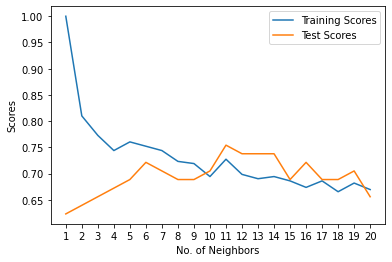

In [61]:
plt.plot(neighbors, train_scores, label="Training Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("No. of Neighbors")
plt.ylabel("Scores")
plt.legend()

print(f"Maximum KNN score on the test: {max(test_scores)*100:.2f}%")
print(f"The corresponding n-neighbors is: {test_scores.index(max(test_scores))+1}")

### Hpyerparameter tuning with RandomisedSearchCV (Cross Validation)

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

While going through the documentation of RandomizedSearchCV, it is mentioned that it is highly recommended to use continuos
distributions for continuos parameters

In [45]:
# Create a hyperparameter grid for Logistic Regression
# After going through the logistic regression parameters we come to the conclusion of tuning these parameters.
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                           "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
# After going through the random forest classification parameters we come to the conclusion of tuning these parameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
                 "max_depth": [None, 3, 5, 10],
                  "min_samples_split": np.arange(2, 20, 2),
                  "min_samples_leaf": np.arange(1, 20, 2)}

Now we have hyperparameter grids set up for each models, let's tune them using RandomizedSearchCV

In [40]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                                           param_distributions=log_reg_grid,
                                                           cv = 5,
                                                           n_iter = 20,
                                                           verbose = True)

# Fit random hyperparameter search model for Logistic Regression 
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
# Finding the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [50]:
#Evaluating the RandomizedSearchCV model
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we have tuned logistic regression, let's do the same for RandomForestClassifier

In [46]:
# Setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                                  param_distributions=rf_grid,
                                                  cv = 5,
                                                  n_iter = 20,
                                                  verbose = True)

# Fit the random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [49]:
# Finding the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [51]:
#Evaluating the RandomizedSearchCV model
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter tuning with GridSearchCV

Since our LogisticRegression model provides the best score so far, we will try to improve it using GridSearchCV

In [62]:
# Different Hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                           "solver": ["liblinear"]}

#setup grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                            param_grid = log_reg_grid,
                                              cv = 5,
                                             verbose = True)

# Fit the grid hyperparameter model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [63]:
#Check the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [64]:
# Evaluate the Grid Search model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluating our tuned machine learning classifier beyond accuracy 

* ROC Curve and AUC Curve 
* Classification Report
* Precision
* Recall
* F1 Score
* Confusion matrix

and it would be great if cross-validation is used wherever possible.

To make comparisons and evaluate our trained model, first we need to make predictions

In [65]:
# Make predictions using our tuned model

y_preds = gs_log_reg.predict(X_test)

In [66]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

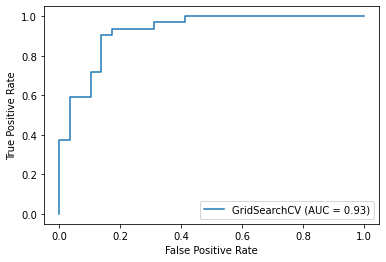

In [69]:
# Plot ROC Curve and calculate the AUC metric
plot_roc_curve (gs_log_reg, X_test, y_test);

In [70]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


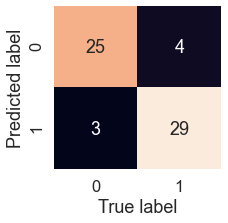

In [72]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heat map
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                                annot = True,
                                cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

### Classification Report

* Precision - A model which produces no false positives has a precision of 1.0
* Recall - A model which produces no false negatives has a recall of 1.0
* F1-score: Average of precision and recall
* Support: No. of samples each metric was calculated on.
* macro avg: average of the scores of the two labels without considering the weightes
* weighted avg: average of the scores of the two labels with considering the weights (quite important to look at)

In [75]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross validation.

We're going to calculate the accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [77]:
# check best hyper parameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [78]:
# Create a new classifier with the best parameters

clf = LogisticRegression(C = 0.20433597178569418,
                                        solver = 'liblinear')

In [84]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, scoring = "accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [85]:
# Cross-validate Precision
cv_prec = cross_val_score(clf, X, y, scoring = "precision")

cv_prec = np.mean(cv_prec) 
cv_prec

0.8207936507936507

In [86]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, scoring = "recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [87]:
# Cross-validated F1-score
cv_f1 = cross_val_score(clf, X, y, scoring = "f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

### Visualize our cross-validated metrics

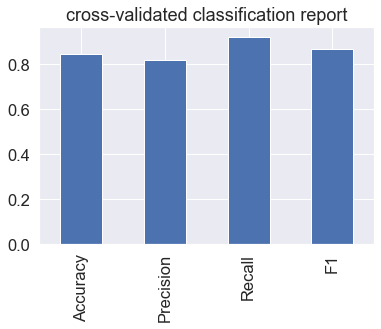

In [90]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                                              "Precision": cv_prec,
                                                "Recall": cv_recall,
                                                "F1": cv_f1},
                                                 index = [0])
cv_metrics.T.plot.bar(title = "cross-validated classification report",
                                    legend = False);

### Feature Importance

Feature importance is another way of asking which feature contributed most to the outcomes of the model and how do they contribute

Finding feature importance is different for each machine learning model.